In [1]:
import pandas as pd
import sys  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
pd.set_option('display.max_rows', None)  # Ìñâ Ï†úÌïú Ìï¥Ï†ú
pd.set_option('display.max_columns', None)  # Ïó¥ Ï†úÌïú Ìï¥Ï†ú
pd.set_option('display.width', None)  # ÎÑàÎπÑ Ï†úÌïú Ìï¥Ï†ú

In [3]:
import platform
import matplotlib.pyplot as plt
from matplotlib import rc

def set_korean_font():
    os_name = platform.system()

    if os_name == "Darwin":        # macOS
        rc("font", family="AppleGothic")
    elif os_name == "Windows":     # Windows
        rc("font", family="Malgun Gothic")   # ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Í∏ÄÍº¥
    else:                          # Linux Îì±
        # ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Í∏ÄÍº¥ ÏòàÏãú ‚îÄ ÌïÑÏöîÏãú apt/yum, brew, winget Îì±ÏúºÎ°ú ÏÑ§Ïπò
        rc("font", family="NanumGothic")

    # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏Í∞Ä ‚óª Î°ú ÎÇòÏò§Îäî Î¨∏Ï†ú Î∞©ÏßÄ
    plt.rcParams["axes.unicode_minus"] = False

# Ìò∏Ï∂ú
set_korean_font()

In [4]:
df = pd.read_csv('../data/train.csv')


df.head()


num_date_time  Í±¥Î¨ºÎ≤àÌò∏           ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÏäµÎèÑ(%)  ÏùºÏ°∞(hr)  \
0  1_20240601 00     1  20240601 00    18.3      0.0      2.6   82.0     0.0   
1  1_20240601 01     1  20240601 01    18.3      0.0      2.7   82.0     0.0   
2  1_20240601 02     1  20240601 02    18.1      0.0      2.6   80.0     0.0   
3  1_20240601 03     1  20240601 03    18.0      0.0      2.6   81.0     0.0   
4  1_20240601 04     1  20240601 04    17.8      0.0      1.3   81.0     0.0   

   ÏùºÏÇ¨(MJ/m2)  Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)  
0        0.0     5794.80  
1        0.0     5591.85  
2        0.0     5338.17  
3        0.0     4554.42  
4        0.0     3602.25

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   Í±¥Î¨ºÎ≤àÌò∏           204000 non-null  int64  
 2   ÏùºÏãú             204000 non-null  object 
 3   Í∏∞Ïò®(¬∞C)         204000 non-null  float64
 4   Í∞ïÏàòÎüâ(mm)        204000 non-null  float64
 5   ÌíçÏÜç(m/s)        204000 non-null  float64
 6   ÏäµÎèÑ(%)          204000 non-null  float64
 7   ÏùºÏ°∞(hr)         204000 non-null  float64
 8   ÏùºÏÇ¨(MJ/m2)      204000 non-null  float64
 9   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [6]:
building = pd.read_csv('../data/building_info.csv')



building.head()


Í±¥Î¨ºÎ≤àÌò∏ Í±¥Î¨ºÏú†Ìòï    Ïó∞Î©¥Ï†Å(m2)   ÎÉâÎ∞©Î©¥Ï†Å(m2) ÌÉúÏñëÍ¥ëÏö©Îüâ(kW) ESSÏ†ÄÏû•Ïö©Îüâ(kWh) PCSÏö©Îüâ(kW)
0     1   Ìò∏ÌÖî   82912.71   77586.00         -            -         -
1     2   ÏÉÅÏö©   40658.90   30392.82         -            -         -
2     3   Î≥ëÏõê  560431.00  418992.00    278.58            -         -
3     4   Ìò∏ÌÖî   41813.29   23715.71         -            -         -
4     5   ÌïôÍµê  403749.39  248507.00   1983.05         1025       250

In [7]:
# '-' Ï≤òÎ¶¨ Î∞è Ïà´ÏûêÌòï Î≥ÄÌôò + Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
# 0ÏúºÎ°ú Î∞îÍæº Ïù¥Ïú†Îäî ÌÉúÏñëÍ¥ë, ESS, PCS Ïö©ÎüâÏù¥ ÏóÜÎäî Í±¥Î¨ºÎèÑ ÏûàÏùÑ Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏
# Ï§ëÏïôÍ∞íÏù¥ÎÇò ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö∞Îäî Î∞©Î≤ïÎèÑ ÏûàÏßÄÎßå, Ïù¥ Í≤ΩÏö∞ÏóêÎäî 0ÏúºÎ°ú Ï≤òÎ¶¨
for col in ['ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)', 'ESSÏ†ÄÏû•Ïö©Îüâ(kWh)', 'PCSÏö©Îüâ(kW)']:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# ÌïÑÏöîÌïú Ïó¥Îßå Ï∂îÏ∂ú
static_features = building[['Í±¥Î¨ºÎ≤àÌò∏', 'ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)', 'ESSÏ†ÄÏû•Ïö©Îüâ(kWh)', 'PCSÏö©Îüâ(kW)']]

# merge ÏàòÌñâ (ÏôºÏ™Ω Í∏∞Ï§Ä: df)
merged_df = df.merge(static_features, on='Í±¥Î¨ºÎ≤àÌò∏', how='left')


In [8]:


counts = df['Í∞ïÏàòÎüâ(mm)'].value_counts()
print(counts)

Í∞ïÏàòÎüâ(mm)
0.0      185388
0.1        2449
0.2        1592
0.3        1178
0.4         893
0.5         860
0.7         676
0.6         593
0.8         468
0.9         380
1.0         358
1.1         322
1.4         285
1.5         282
1.2         278
1.9         275
1.3         249
1.7         215
1.6         199
1.8         185
2.7         161
2.2         153
2.3         150
2.6         146
3.5         146
2.9         145
2.8         144
2.1         136
3.0         136
2.4         135
3.7         131
3.6         130
3.3         123
3.8         123
3.2         122
2.5         122
3.1         119
3.4         115
4.0         112
2.0          99
4.9          87
4.8          83
4.1          82
3.9          81
8.1          78
4.5          77
4.4          76
5.2          76
5.1          72
7.2          72
5.0          71
5.5          70
5.9          69
5.6          65
7.7          63
7.3          61
4.6          59
4.2          56
12.3         52
6.4          51
14.0         51
6.1       

In [9]:
# merge Ï†úÎåÄÎ°ú ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print(merged_df.columns)
print(merged_df.head())


Index(['num_date_time', 'Í±¥Î¨ºÎ≤àÌò∏', 'ÏùºÏãú', 'Í∏∞Ïò®(¬∞C)', 'Í∞ïÏàòÎüâ(mm)', 'ÌíçÏÜç(m/s)', 'ÏäµÎèÑ(%)',
       'ÏùºÏ°∞(hr)', 'ÏùºÏÇ¨(MJ/m2)', 'Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)', 'ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)', 'ESSÏ†ÄÏû•Ïö©Îüâ(kWh)',
       'PCSÏö©Îüâ(kW)'],
      dtype='object')
   num_date_time  Í±¥Î¨ºÎ≤àÌò∏           ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÏäµÎèÑ(%)  ÏùºÏ°∞(hr)  \
0  1_20240601 00     1  20240601 00    18.3      0.0      2.6   82.0     0.0   
1  1_20240601 01     1  20240601 01    18.3      0.0      2.7   82.0     0.0   
2  1_20240601 02     1  20240601 02    18.1      0.0      2.6   80.0     0.0   
3  1_20240601 03     1  20240601 03    18.0      0.0      2.6   81.0     0.0   
4  1_20240601 04     1  20240601 04    17.8      0.0      1.3   81.0     0.0   

   ÏùºÏÇ¨(MJ/m2)  Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)  ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)  ESSÏ†ÄÏû•Ïö©Îüâ(kWh)  PCSÏö©Îüâ(kW)  
0        0.0     5794.80        0.0           0.0        0.0  
1        0.0     5591.85        0.0           0.0       

In [10]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   Í±¥Î¨ºÎ≤àÌò∏           204000 non-null  int64  
 2   ÏùºÏãú             204000 non-null  object 
 3   Í∏∞Ïò®(¬∞C)         204000 non-null  float64
 4   Í∞ïÏàòÎüâ(mm)        204000 non-null  float64
 5   ÌíçÏÜç(m/s)        204000 non-null  float64
 6   ÏäµÎèÑ(%)          204000 non-null  float64
 7   ÏùºÏ°∞(hr)         204000 non-null  float64
 8   ÏùºÏÇ¨(MJ/m2)      204000 non-null  float64
 9   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   Í±¥Î¨ºÎ≤àÌò∏           16800 non-null  int64  
 2   ÏùºÏãú             16800 non-null  object 
 3   Í∏∞Ïò®(¬∞C)         16800 non-null  float64
 4   Í∞ïÏàòÎüâ(mm)        16800 non-null  float64
 5   ÌíçÏÜç(m/s)        16800 non-null  float64
 6   ÏäµÎèÑ(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [12]:
train = train.drop(columns=['ÏùºÏ°∞(hr)', 'ÏùºÏÇ¨(MJ/m2)'])  # ÏùºÏ°∞ÏôÄ ÏùºÏÇ¨ Ïó¥ Ï†úÍ±∞

train['is_train'] = 1
test['is_train'] = 0

combined_df = pd.concat([train, test], ignore_index=True)

combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   Í±¥Î¨ºÎ≤àÌò∏           220800 non-null  int64  
 2   ÏùºÏãú             220800 non-null  object 
 3   Í∏∞Ïò®(¬∞C)         220800 non-null  float64
 4   Í∞ïÏàòÎüâ(mm)        220800 non-null  float64
 5   ÌíçÏÜç(m/s)        220800 non-null  float64
 6   ÏäµÎèÑ(%)          220800 non-null  float64
 7   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   Í±¥Î¨ºÎ≤àÌò∏           220800 non-null  int64  
 2   ÏùºÏãú             220800 non-null  object 
 3   Í∏∞Ïò®(¬∞C)         220800 non-null  float64
 4   Í∞ïÏàòÎüâ(mm)        220800 non-null  float64
 5   ÌíçÏÜç(m/s)        220800 non-null  float64
 6   ÏäµÎèÑ(%)          220800 non-null  float64
 7   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


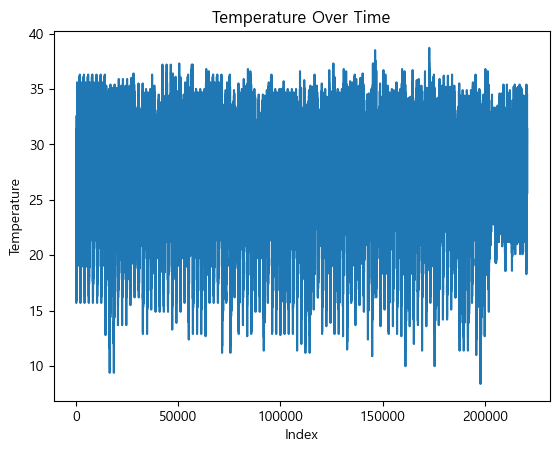

In [14]:
temp = combined_df['Í∏∞Ïò®(¬∞C)'] 

sns.lineplot(x=temp.index, y=temp.values)
plt.title('Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()


Text(0.5, 1.0, 'Temperature Distribution')

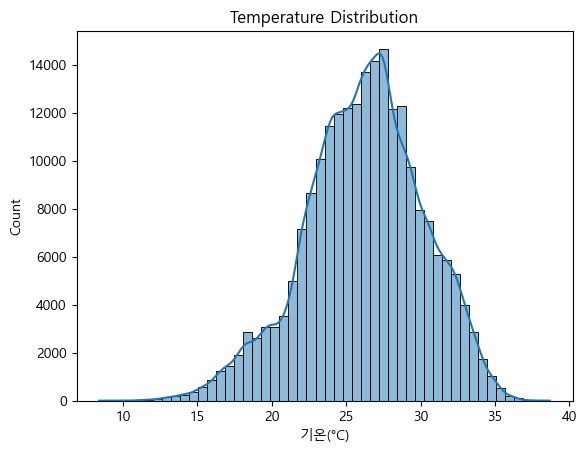

In [15]:
sns.histplot(temp, kde=True, bins=50)
plt.title('Temperature Distribution')

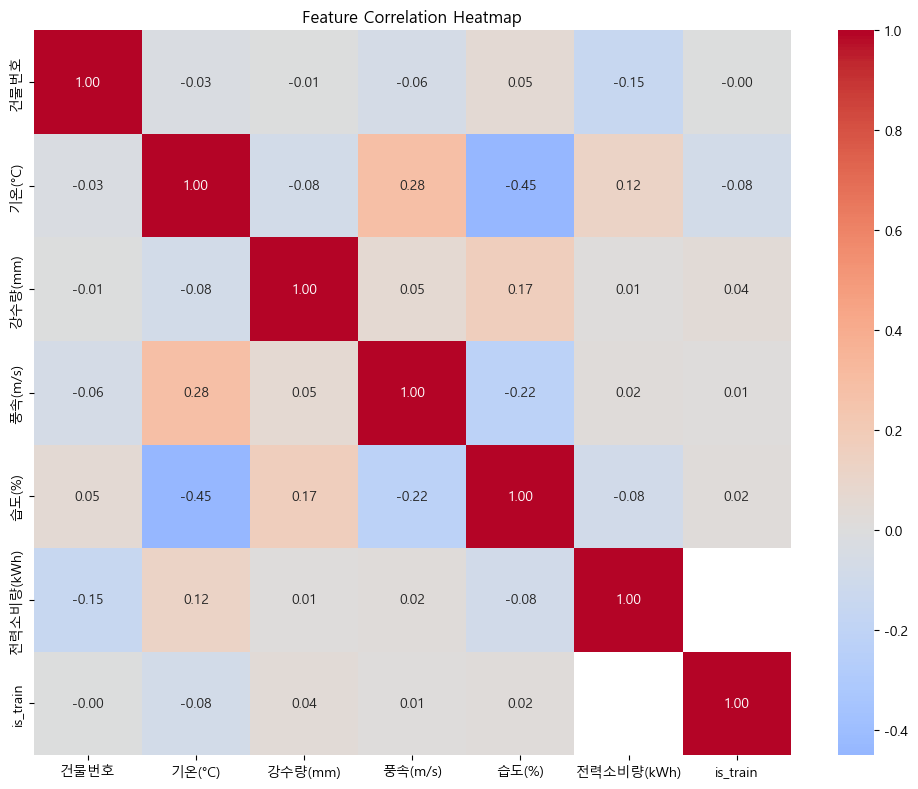

In [16]:

# ÏàòÏπòÌòï Ïó¥Îßå Ï∂îÏ∂ú (Î¨∏ÏûêÌòï, ÎÇ†ÏßúÌòï Ï†úÏô∏)
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨
corr = combined_df[numeric_cols].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [17]:

# 2. '-' Í∞íÏùÑ NaNÏúºÎ°ú, Í∑∏ ÌõÑ 0ÏúºÎ°ú ÎåÄÏ≤¥
cols_to_convert = ['ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)', 'ESSÏ†ÄÏû•Ïö©Îüâ(kWh)', 'PCSÏö©Îüâ(kW)']
for col in cols_to_convert:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 3. ÌïÑÏöîÌïú Ïó¥Îßå merge
merged_df = combined_df.merge(
    building[['Í±¥Î¨ºÎ≤àÌò∏'] + cols_to_convert],
    on='Í±¥Î¨ºÎ≤àÌò∏',
    how='left'
)

In [18]:
print(merged_df[cols_to_convert].describe())  # Í∞í Î∂ÑÌè¨ ÌôïÏù∏
print(merged_df.isnull().sum())              # NaN Ïó¨Î∂Ä ÌôïÏù∏


           ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)  ESSÏ†ÄÏû•Ïö©Îüâ(kWh)      PCSÏö©Îüâ(kW)
count  220800.000000  220800.00000  220800.000000
mean      231.792200     116.30800      58.270000
std       419.067099     455.25775     219.863812
min         0.000000       0.00000       0.000000
25%         0.000000       0.00000       0.000000
50%        28.125000       0.00000       0.000000
75%       228.670000       0.00000       0.000000
max      1983.050000    3100.00000    1500.000000
num_date_time        0
Í±¥Î¨ºÎ≤àÌò∏                 0
ÏùºÏãú                   0
Í∏∞Ïò®(¬∞C)               0
Í∞ïÏàòÎüâ(mm)              0
ÌíçÏÜç(m/s)              0
ÏäµÎèÑ(%)                0
Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)       16800
is_train             0
ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)            0
ESSÏ†ÄÏû•Ïö©Îüâ(kWh)         0
PCSÏö©Îüâ(kW)            0
dtype: int64


In [19]:
merged_df['ÏùºÏãú'] = pd.to_datetime(merged_df['ÏùºÏãú'], format='%Y%m%d %H')


In [20]:

# 2. ÏãúÍ∞Ñ Í∏∞Î∞ò ÌååÏÉù ÌîºÏ≤ò
merged_df['hour'] = merged_df['ÏùºÏãú'].dt.hour                   # ÏãúÍ∞ÑÎåÄ (0~23)
merged_df['dayofweek'] = merged_df['ÏùºÏãú'].dt.dayofweek         # ÏöîÏùº (Ïõî=0 ~ Ïùº=6)
merged_df['month'] = merged_df['ÏùºÏãú'].dt.month                 # Ïõî (1~12)
merged_df['is_weekend'] = (merged_df['dayofweek'] >= 5).astype(int)  # Ï£ºÎßê Ïó¨Î∂Ä

# 3. Í≥ÑÏ†à Ï†ïÎ≥¥
def get_season(month):
    if month in [3, 4, 5]: return 1  # Î¥Ñ
    elif month in [6, 7, 8]: return 2  # Ïó¨Î¶Ñ
    elif month in [9, 10, 11]: return 3  # Í∞ÄÏùÑ
    else: return 4  # Í≤®Ïö∏

merged_df['season'] = merged_df['month'].map(get_season)

# 4. ÏÑ§ÎπÑ ÏÑ§Ïπò Ïó¨Î∂Ä (0/1)
merged_df['has_solar'] = (merged_df['ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)'] > 0).astype(int)
merged_df['has_ess'] = (merged_df['ESSÏ†ÄÏû•Ïö©Îüâ(kWh)'] > 0).astype(int)
merged_df['has_pcs'] = (merged_df['PCSÏö©Îüâ(kW)'] > 0).astype(int)

# 5. ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò (Í∏∞Ïò® √ó ÏÑ§ÎπÑ)
merged_df['Í∏∞Ïò®xÌÉúÏñëÍ¥ë'] = merged_df['Í∏∞Ïò®(¬∞C)'] * merged_df['has_solar']
merged_df['Í∏∞Ïò®xESS'] = merged_df['Í∏∞Ïò®(¬∞C)'] * merged_df['has_ess']

# 6. Ï≤¥Í∞êÏò®ÎèÑ (Simplified version)
merged_df['Ï≤¥Í∞êÏò®ÎèÑ'] = merged_df['Í∏∞Ïò®(¬∞C)'] - ((0.55 - 0.0055 * merged_df['ÏäµÎèÑ(%)']) * (merged_df['Í∏∞Ïò®(¬∞C)'] - 14.5))

# 7. Î∂àÏæåÏßÄÏàò (Discomfort Index)
merged_df['Î∂àÏæåÏßÄÏàò'] = 0.81 * merged_df['Í∏∞Ïò®(¬∞C)'] + 0.01 * merged_df['ÏäµÎèÑ(%)'] * (0.99 * merged_df['Í∏∞Ïò®(¬∞C)'] - 14.3) + 46.3

# 8. Ï†ÑÎ†•ÏÜåÎπÑÎüâÏùÄ trainÏóêÎßå Ï°¥Ïû¨ÌïòÎØÄÎ°ú Ï†úÏô∏ ÎåÄÏÉÅ
# 9. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Ïó¥ Ï†úÍ±∞ Í∞ÄÎä•

In [21]:
merged_df.info()  # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥ ÌôïÏù∏


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  220800 non-null  object        
 1   Í±¥Î¨ºÎ≤àÌò∏           220800 non-null  int64         
 2   ÏùºÏãú             220800 non-null  datetime64[ns]
 3   Í∏∞Ïò®(¬∞C)         220800 non-null  float64       
 4   Í∞ïÏàòÎüâ(mm)        220800 non-null  float64       
 5   ÌíçÏÜç(m/s)        220800 non-null  float64       
 6   ÏäµÎèÑ(%)          220800 non-null  float64       
 7   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)     204000 non-null  float64       
 8   is_train       220800 non-null  int64         
 9   ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)      220800 non-null  float64       
 10  ESSÏ†ÄÏû•Ïö©Îüâ(kWh)   220800 non-null  float64       
 11  PCSÏö©Îüâ(kW)      220800 non-null  float64       
 12  hour           220800 non-null  int32         
 13  dayofweek      220800 non-null  int32    

In [22]:
merged_df.head()  # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌôïÏù∏


num_date_time  Í±¥Î¨ºÎ≤àÌò∏                  ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÏäµÎèÑ(%)  \
0  1_20240601 00     1 2024-06-01 00:00:00    18.3      0.0      2.6   82.0   
1  1_20240601 01     1 2024-06-01 01:00:00    18.3      0.0      2.7   82.0   
2  1_20240601 02     1 2024-06-01 02:00:00    18.1      0.0      2.6   80.0   
3  1_20240601 03     1 2024-06-01 03:00:00    18.0      0.0      2.6   81.0   
4  1_20240601 04     1 2024-06-01 04:00:00    17.8      0.0      1.3   81.0   

   Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)  is_train  ÌÉúÏñëÍ¥ëÏö©Îüâ(kW)  ESSÏ†ÄÏû•Ïö©Îüâ(kWh)  PCSÏö©Îüâ(kW)  hour  dayofweek  \
0     5794.80         1        0.0           0.0        0.0     0          5   
1     5591.85         1        0.0           0.0        0.0     1          5   
2     5338.17         1        0.0           0.0        0.0     2          5   
3     4554.42         1        0.0           0.0        0.0     3          5   
4     3602.25         1        0.0           0.0        0.0     4          5   

   month  is_weekend  season  has_solar  has_ess  has_pcs  Í∏∞Ïò®xÌÉúÏñëÍ¥ë  Í∏∞Ïò®xESS  \
0      6           1       2          0        0        0     0.0     0.0   
1      6           1       2          0        0        0     0.0     0.0   
2      6           1       2          0        0        0     0.0     0.0   
3      6           1       2          0        0        0     0.0     0.0   
4      6           1       2          0        0        0     0.0     0.0   

       Ï≤¥Í∞êÏò®ÎèÑ      Î∂àÏæåÏßÄÏàò  
0  17.92380  64.25294  
1  17.92380  64.25294  
2  17.70400  63.85620  
3  17.63425  63.73120  
4  17.45515  63.40882

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from tqdm.auto import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) Í≥ÑÏÇ∞"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

class AdvancedStackingEnsemble:
    def __init__(self, cv_folds=5, random_state=42, max_features=None):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.max_features = max_features
        self.scaler = RobustScaler()
        self.standard_scaler = StandardScaler()
        
        # Base Model ÌååÎùºÎØ∏ÌÑ∞ (ÌïÑÏàòÎßå)
        self.lgbm_params = {
            'objective': 'regression',
            'metric': 'mae',
            'num_leaves': 63,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'device_type': 'cpu',
            'verbose': -1,
            'early_stopping_rounds': 100
        }
        
        self.xgb_params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'tree_method': 'hist',
            'verbosity': 0,
            'early_stopping_rounds': 100
        }
        
        self.catboost_params = {
            'objective': 'RMSE',
            'eval_metric': 'MAE',
            'depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bylevel': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'verbose': False,
            'early_stopping_rounds': 100
        }
        
        # Ï∂îÍ∞Ä Base Models
        self.rf_params = {
            'n_estimators': 500,
            'max_depth': 8,
            'min_samples_split': 5,
            'min_samples_leaf': 2,
            'random_state': random_state,
            'n_jobs': -1
        }
        
        self.et_params = {
            'n_estimators': 500,
            'max_depth': 8,
            'min_samples_split': 5,
            'min_samples_leaf': 2,
            'random_state': random_state,
            'n_jobs': -1
        }
    
    def prepare_data(self, df):
        """Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ"""
        drop_cols = ['num_date_time', 'ÏùºÏãú', 'is_train']
        target_col = 'Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'
        
        # ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
        train_df = df[df['is_train'] == 1].copy()
        test_df = df[df['is_train'] == 0].copy()
        
        # ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
        X_train = train_df.drop(columns=drop_cols + [target_col])
        y_train = train_df[target_col]
        X_test = test_df.drop(columns=drop_cols + [target_col])
        
        # max_featuresÍ∞Ä ÏÑ§Ï†ïÎêú Í≤ΩÏö∞ ÌîºÏ≤ò ÏÑ†ÌÉù
        if self.max_features and self.max_features < X_train.shape[1]:
            print(f"ÌîºÏ≤ò ÏÑ†ÌÉù: {X_train.shape[1]}Í∞ú -> {self.max_features}Í∞ú")
            correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
            top_features = correlations.head(self.max_features).index.tolist()
            X_train = X_train[top_features]
            X_test = X_test[top_features]
        
        print(f"Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: ÌõàÎ†® {X_train.shape}, ÌÖåÏä§Ìä∏ {X_test.shape}")
        print(f"ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Ïàò: {X_train.shape[1]}Í∞ú")
        
        # ÏàòÏπòÌòï/Î≤îÏ£ºÌòï ÌîºÏ≤ò Î∂ÑÎ¶¨
        numeric_features = X_train.select_dtypes(include=[np.number]).columns
        categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
        
        print(f"ÏàòÏπòÌòï ÌîºÏ≤ò: {len(numeric_features)}Í∞ú, Î≤îÏ£ºÌòï ÌîºÏ≤ò: {len(categorical_features)}Í∞ú")
        
        # Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        X_train_scaled, X_test_scaled = self._scale_data(X_train, X_test, numeric_features, categorical_features)
        X_train_std, X_test_std = self._standard_scale_data(X_train, X_test, numeric_features, categorical_features)
        
        return {
            'original': (X_train, X_test),
            'robust_scaled': (X_train_scaled, X_test_scaled),
            'standard_scaled': (X_train_std, X_test_std),
            'target': y_train
        }
    
    def _scale_data(self, X_train, X_test, numeric_features, categorical_features):
        """RobustScalerÎ•º ÏÇ¨Ïö©Ìïú Ïä§ÏºÄÏùºÎßÅ"""
        if len(numeric_features) > 0:
            X_train_numeric = X_train[numeric_features]
            X_test_numeric = X_test[numeric_features]
            
            X_train_scaled_values = self.scaler.fit_transform(X_train_numeric)
            X_test_scaled_values = self.scaler.transform(X_test_numeric)
            
            X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=numeric_features, index=X_train.index)
            X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=numeric_features, index=X_test.index)
            
            if len(categorical_features) > 0:
                X_train_final = pd.concat([X_train_scaled, X_train[categorical_features]], axis=1)
                X_test_final = pd.concat([X_test_scaled, X_test[categorical_features]], axis=1)
            else:
                X_train_final = X_train_scaled
                X_test_final = X_test_scaled
        else:
            X_train_final = X_train
            X_test_final = X_test
        
        return X_train_final, X_test_final
    
    def _standard_scale_data(self, X_train, X_test, numeric_features, categorical_features):
        """StandardScalerÎ•º ÏÇ¨Ïö©Ìïú Ïä§ÏºÄÏùºÎßÅ"""
        if len(numeric_features) > 0:
            X_train_numeric = X_train[numeric_features]
            X_test_numeric = X_test[numeric_features]
            
            X_train_scaled_values = self.standard_scaler.fit_transform(X_train_numeric)
            X_test_scaled_values = self.standard_scaler.transform(X_test_numeric)
            
            X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=numeric_features, index=X_train.index)
            X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=numeric_features, index=X_test.index)
            
            if len(categorical_features) > 0:
                X_train_final = pd.concat([X_train_scaled, X_train[categorical_features]], axis=1)
                X_test_final = pd.concat([X_test_scaled, X_test[categorical_features]], axis=1)
            else:
                X_train_final = X_train_scaled
                X_test_final = X_test_scaled
        else:
            X_train_final = X_train
            X_test_final = X_test
        
        return X_train_final, X_test_final
    
    def train_base_models(self, data_dict):
        """Base Models ÌõàÎ†® (Level 1)"""
        X_train_orig, X_test_orig = data_dict['original']
        X_train_robust, X_test_robust = data_dict['robust_scaled']
        X_train_std, X_test_std = data_dict['standard_scaled']
        y_train = data_dict['target']
        
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        
        # Base model ÏòàÏ∏°ÏùÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥
        n_train = len(X_train_orig)
        n_test = len(X_test_orig)
        
        base_models = {
            'lgbm': {'data': 'robust_scaled', 'params': self.lgbm_params},
            'xgb': {'data': 'original', 'params': self.xgb_params},
            'catboost': {'data': 'original', 'params': self.catboost_params},
            'rf': {'data': 'original', 'params': self.rf_params},
            'et': {'data': 'robust_scaled', 'params': self.et_params}
        }
        
        oof_predictions = {}
        test_predictions = {}
        model_scores = {}
        
        for model_name, config in base_models.items():
            print(f"\n=== {model_name.upper()} ÌõàÎ†® ÏãúÏûë ===")
            
            # Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
            if config['data'] == 'robust_scaled':
                X_tr, X_te = X_train_robust, X_test_robust
            elif config['data'] == 'standard_scaled':
                X_tr, X_te = X_train_std, X_test_std
            else:
                X_tr, X_te = X_train_orig, X_test_orig
            
            oof_preds = np.zeros(n_train)
            test_preds = np.zeros(n_test)
            fold_scores = []
            
            for fold, (train_idx, val_idx) in enumerate(kf.split(X_tr)):
                X_fold_train, X_fold_val = X_tr.iloc[train_idx], X_tr.iloc[val_idx]
                y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
                
                # Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
                if model_name == 'lgbm':
                    model = LGBMRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train, 
                             eval_set=[(X_fold_val, y_fold_val)],
                             callbacks=[lgbm.log_evaluation(period=0)])
                elif model_name == 'xgb':
                    model = XGBRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train,
                             eval_set=[(X_fold_val, y_fold_val)], verbose=False)
                elif model_name == 'catboost':
                    model = CatBoostRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train,
                             eval_set=[(X_fold_val, y_fold_val)])
                elif model_name == 'rf':
                    model = RandomForestRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train)
                elif model_name == 'et':
                    model = ExtraTreesRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train)
                
                # ÏòàÏ∏°
                val_pred = model.predict(X_fold_val)
                oof_preds[val_idx] = val_pred
                test_preds += model.predict(X_te) / self.cv_folds
                
                fold_score = smape(y_fold_val, val_pred)
                fold_scores.append(fold_score)
                print(f"Fold {fold + 1}: {fold_score:.4f}")
            
            avg_score = np.mean(fold_scores)
            print(f"ÌèâÍ∑† SMAPE: {avg_score:.4f} (¬±{np.std(fold_scores):.4f})")
            
            oof_predictions[model_name] = oof_preds
            test_predictions[model_name] = test_preds
            model_scores[model_name] = avg_score
        
        return oof_predictions, test_predictions, model_scores
    
    def train_meta_models(self, oof_predictions, y_train):
        """Meta Models ÌõàÎ†® (Level 2)"""
        print(f"\n=== META MODELS ÌõàÎ†® ÏãúÏûë ===")
        
        # Level 1 ÏòàÏ∏°ÏùÑ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©
        meta_features = np.column_stack(list(oof_predictions.values()))
        
        # Îã§ÏñëÌïú Meta Model Ï†ïÏùò
        meta_models = {
            'ridge': Ridge(alpha=0.01, random_state=self.random_state),
            'lasso': Lasso(alpha=0.01, random_state=self.random_state),
            'elastic': ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=self.random_state),
            'lgbm_meta': LGBMRegressor(
                objective='regression',
                metric='mae',
                num_leaves=15,
                learning_rate=0.1,
                n_estimators=200,
                random_state=self.random_state,
                verbose=-1
            ),
            'xgb_meta': XGBRegressor(
                objective='reg:squarederror',
                eval_metric='mae',
                max_depth=3,
                learning_rate=0.1,
                n_estimators=200,
                random_state=self.random_state,
                verbosity=0
            )
        }
        
        # Meta Model ÍµêÏ∞® Í≤ÄÏ¶ù
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        meta_scores = {}
        trained_meta_models = {}
        
        for meta_name, meta_model in meta_models.items():
            fold_scores = []
            
            for fold, (train_idx, val_idx) in enumerate(kf.split(meta_features)):
                X_meta_train, X_meta_val = meta_features[train_idx], meta_features[val_idx]
                y_meta_train, y_meta_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
                
                meta_model_fold = meta_model.__class__(**meta_model.get_params())
                meta_model_fold.fit(X_meta_train, y_meta_train)
                
                val_pred = meta_model_fold.predict(X_meta_val)
                fold_score = smape(y_meta_val, val_pred)
                fold_scores.append(fold_score)
            
            avg_score = np.mean(fold_scores)
            meta_scores[meta_name] = avg_score
            
            # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÏµúÏ¢Ö Î™®Îç∏ ÌõàÎ†®
            final_meta_model = meta_model.__class__(**meta_model.get_params())
            final_meta_model.fit(meta_features, y_train)
            trained_meta_models[meta_name] = final_meta_model
            
            print(f"{meta_name}: {avg_score:.4f}")
        
        return trained_meta_models, meta_scores
    
    def create_ensemble_predictions(self, oof_predictions, test_predictions, 
                                  trained_meta_models, model_scores, y_train):
        """Îã§ÏñëÌïú ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏúºÎ°ú ÏµúÏ¢Ö ÏòàÏ∏° ÏÉùÏÑ±"""
        print(f"\n=== ÏïôÏÉÅÎ∏î ÏòàÏ∏° ÏÉùÏÑ± ===")
        
        # Level 1 test ÏòàÏ∏°ÏùÑ meta featuresÎ°ú Î≥ÄÌôò
        meta_test_features = np.column_stack(list(test_predictions.values()))
        
        ensemble_predictions = {}
        ensemble_scores = {}
        
        # 1. Îã®Ïàú ÌèâÍ∑†
        simple_avg_test = np.mean(list(test_predictions.values()), axis=0)
        simple_avg_oof = np.mean(list(oof_predictions.values()), axis=0)
        ensemble_predictions['simple_average'] = simple_avg_test
        ensemble_scores['simple_average'] = smape(y_train, simple_avg_oof)
        
        # 2. Í∞ÄÏ§ë ÌèâÍ∑† (ÏÑ±Îä• Í∏∞Î∞ò)
        scores = np.array(list(model_scores.values()))
        weights = 1 / scores
        weights = weights / weights.sum()
        
        weighted_avg_test = np.average(list(test_predictions.values()), weights=weights, axis=0)
        weighted_avg_oof = np.average(list(oof_predictions.values()), weights=weights, axis=0)
        ensemble_predictions['weighted_average'] = weighted_avg_test
        ensemble_scores['weighted_average'] = smape(y_train, weighted_avg_oof)
        
        # 3. ÏàúÏúÑ Í∏∞Î∞ò ÌèâÍ∑†
        rank_test_preds = []
        rank_oof_preds = []
        for pred in test_predictions.values():
            rank_test_preds.append(np.argsort(np.argsort(pred)))
        for pred in oof_predictions.values():
            rank_oof_preds.append(np.argsort(np.argsort(pred)))
        
        rank_avg_test = np.mean(rank_test_preds, axis=0)
        rank_avg_oof = np.mean(rank_oof_preds, axis=0)
        ensemble_predictions['rank_average'] = rank_avg_test
        ensemble_scores['rank_average'] = smape(y_train, rank_avg_oof)
        
        # 4. Meta Model ÏòàÏ∏°Îì§
        for meta_name, meta_model in trained_meta_models.items():
            meta_pred = meta_model.predict(meta_test_features)
            meta_oof = meta_model.predict(np.column_stack(list(oof_predictions.values())))
            
            ensemble_predictions[f'meta_{meta_name}'] = np.maximum(meta_pred, 0)
            ensemble_scores[f'meta_{meta_name}'] = smape(y_train, meta_oof)
        
        # 5. ÌïòÏù¥Î∏åÎ¶¨Îìú ÏïôÏÉÅÎ∏î (Meta Model + Í∞ÄÏ§ë ÌèâÍ∑†Ïùò Ï°∞Ìï©)
        best_meta = min(trained_meta_models.items(), 
                       key=lambda x: ensemble_scores[f'meta_{x[0]}'])
        best_meta_name, best_meta_model = best_meta
        
        meta_pred = best_meta_model.predict(meta_test_features)
        hybrid_pred = 0.7 * meta_pred + 0.3 * weighted_avg_test
        hybrid_oof = 0.7 * best_meta_model.predict(np.column_stack(list(oof_predictions.values()))) + 0.3 * weighted_avg_oof
        
        ensemble_predictions['hybrid'] = np.maximum(hybrid_pred, 0)
        ensemble_scores['hybrid'] = smape(y_train, hybrid_oof)
        
        # Î™®Îì† ÏòàÏ∏°Í∞íÏùÑ ÏñëÏàòÎ°ú ÌÅ¥Î¶¨Ìïë
        for key in ensemble_predictions:
            ensemble_predictions[key] = np.maximum(ensemble_predictions[key], 0)
        
        return ensemble_predictions, ensemble_scores
    
    def fit_predict(self, df):
        """Ï†ÑÏ≤¥ ÏïôÏÉÅÎ∏î ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ"""
        print("Í≥†Í∏â Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏãúÏûë")
        print("="*60)
        
        # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        data_dict = self.prepare_data(df)
        
        # Level 1: Base Models ÌõàÎ†®
        oof_predictions, test_predictions, model_scores = self.train_base_models(data_dict)
        
        # Level 2: Meta Models ÌõàÎ†®
        trained_meta_models, meta_scores = self.train_meta_models(oof_predictions, data_dict['target'])
        
        # Level 3: Îã§ÏñëÌïú ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏúºÎ°ú ÏµúÏ¢Ö ÏòàÏ∏°
        ensemble_predictions, ensemble_scores = self.create_ensemble_predictions(
            oof_predictions, test_predictions, trained_meta_models, model_scores, data_dict['target']
        )
        
        # Í≤∞Í≥º Ï∂úÎ†•
        print(f"\n=== BASE MODEL ÏÑ±Îä• ===")
        for model, score in model_scores.items():
            print(f"{model}: {score:.4f}")
        
        print(f"\n=== META MODEL ÏÑ±Îä• ===")
        for meta, score in meta_scores.items():
            print(f"{meta}: {score:.4f}")
        
        print(f"\n=== ÏµúÏ¢Ö ÏïôÏÉÅÎ∏î ÏÑ±Îä• ===")
        for ensemble, score in ensemble_scores.items():
            print(f"{ensemble}: {score:.4f}")
        
        return {
            'predictions': ensemble_predictions,
            'scores': ensemble_scores,
            'base_scores': model_scores,
            'meta_scores': meta_scores
        }
    
    def save_submissions(self, df, results):
        """Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•"""
        os.makedirs('../submissions', exist_ok=True)
        test_ids = df[df['is_train'] == 0]['num_date_time'].copy()
        
        predictions = results['predictions']
        scores = results['scores']
        
        for method, pred in predictions.items():
            submission = pd.DataFrame({
                'num_date_time': test_ids,
                'answer': pred
            })
            
            score = scores.get(method, 0)
            filename = f'../submissions/submission_{method}_SMAPE_{score:.4f}.csv'
            submission.to_csv(filename, index=False)
            print(f"Ï†ÄÏû•: {filename}")

# Ïã§Ìñâ Ìï®Ïàò
def run_advanced_stacking_ensemble(merged_df, max_features=None):
    """Í≥†Í∏â Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Î™®Îç∏ Ïã§Ìñâ"""
    print(f"Í≥†Í∏â Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î ÏãúÏûë (ÏµúÎåÄ ÌîºÏ≤ò: {max_features or 'Ï†úÌïúÏóÜÏùå'})")
    print("="*80)
    
    model = AdvancedStackingEnsemble(cv_folds=5, random_state=42, max_features=max_features)
    results = model.fit_predict(merged_df)
    model.save_submissions(merged_df, results)
    
    # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï∂îÏ≤ú
    best_method = min(results['scores'].items(), key=lambda x: x[1])
    print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä•: {best_method[0]} (SMAPE: {best_method[1]:.4f})")
    
    return results

# ÏÇ¨Ïö©Î≤ï
print("ÏÇ¨Ïö©Î≤ï:")
print("results = run_advanced_stacking_ensemble(merged_df)")
print("results = run_advanced_stacking_ensemble(merged_df, max_features=30)")

ÏÇ¨Ïö©Î≤ï:
results = run_advanced_stacking_ensemble(merged_df)
results = run_advanced_stacking_ensemble(merged_df, max_features=30)


In [25]:
results = run_advanced_stacking_ensemble(merged_df)

Í≥†Í∏â Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î ÏãúÏûë (ÏµúÎåÄ ÌîºÏ≤ò: Ï†úÌïúÏóÜÏùå)
Í≥†Í∏â Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÏãúÏûë
Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: ÌõàÎ†® (204000, 20), ÌÖåÏä§Ìä∏ (16800, 20)
ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Ïàò: 20Í∞ú
ÏàòÏπòÌòï ÌîºÏ≤ò: 20Í∞ú, Î≤îÏ£ºÌòï ÌîºÏ≤ò: 0Í∞ú

=== LGBM ÌõàÎ†® ÏãúÏûë ===
Fold 1: 11.2851
Fold 2: 11.6232
Fold 3: 11.2824
Fold 4: 11.4453
Fold 5: 11.3356
ÌèâÍ∑† SMAPE: 11.3943 (¬±0.1287)

=== XGB ÌõàÎ†® ÏãúÏûë ===
Fold 1: 13.0596
Fold 2: 13.5252
Fold 3: 13.0518
Fold 4: 12.8212
Fold 5: 12.5511
ÌèâÍ∑† SMAPE: 13.0018 (¬±0.3211)

=== CATBOOST ÌõàÎ†® ÏãúÏûë ===
Fold 1: 19.1327
Fold 2: 19.3572
Fold 3: 19.0835
Fold 4: 19.3225
Fold 5: 18.9090
ÌèâÍ∑† SMAPE: 19.1610 (¬±0.1643)

=== RF ÌõàÎ†® ÏãúÏûë ===
Fold 1: 32.0035
Fold 2: 31.6540
Fold 3: 30.9501
Fold 4: 26.4567
Fold 5: 26.8764
ÌèâÍ∑† SMAPE: 29.5881 (¬±2.4132)

=== ET ÌõàÎ†® ÏãúÏûë ===
Fold 1: 45.0087
Fold 2: 45.2816
Fold 3: 45.2376
Fold 4: 45.0962
Fold 5: 44.7403
ÌèâÍ∑† SMAPE: 45.0729 (¬±0.1928)

=== META MODELS ÌõàÎ†® ÏãúÏûë ===
ridge: 11.0658
lass

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from tqdm.auto import tqdm
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP Í¥ÄÎ†® import
import shap
from shap import TreeExplainer, LinearExplainer

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'DejaVu Sans'

def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) Í≥ÑÏÇ∞"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

class EnsembleModelWithSHAP:
    def __init__(self, cv_folds=5, random_state=42):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.scaler = RobustScaler()
        
        # ÌõàÎ†®Îêú Î™®Îç∏Îì§ÏùÑ Ï†ÄÏû•Ìï† Î≥ÄÏàò
        self.trained_models = {
            'lgbm': [],
            'xgb': [],
            'meta': None
        }
        
        # SHAP explainerÎì§ÏùÑ Ï†ÄÏû•Ìï† Î≥ÄÏàò
        self.explainers = {}
        self.shap_values = {}
        
        # Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞
        self.lgbm_params = {
            'objective': 'regression',
            'metric': 'mae',
            'num_leaves': 63,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'device_type': 'cpu',
            'verbose': -1,
            'early_stopping_rounds': 100
        }
        
        self.xgb_params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'tree_method': 'hist',
            'verbosity': 0,
            'early_stopping_rounds': 100
        }
        
    def prepare_data(self, df):
        """Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ"""
        drop_cols = ['num_date_time', 'ÏùºÏãú', 'is_train']
        target_col = 'Ï†ÑÎ†•ÏÜåÎπÑÎüâ(kWh)'
        
        # ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
        train_df = df[df['is_train'] == 1].copy()
        test_df = df[df['is_train'] == 0].copy()
        
        # ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
        X_train = train_df.drop(columns=drop_cols + [target_col])
        y_train = train_df[target_col]
        X_test = test_df.drop(columns=drop_cols + [target_col])
        
        print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape}, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {X_test.shape}")
        
        # ÌäπÏÑ±Î™Ö Ï†ÄÏû•
        self.feature_names = X_train.columns.tolist()
        
        # LightGBMÏö© Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞
        X_train_scaled = pd.DataFrame(
            self.scaler.fit_transform(X_train),
            columns=X_train.columns, index=X_train.index
        )
        X_test_scaled = pd.DataFrame(
            self.scaler.transform(X_test),
            columns=X_test.columns, index=X_test.index
        )
        
        return X_train, y_train, X_test, X_train_scaled, X_test_scaled
    
    def cross_validate_model(self, model_name, X_train, y_train, X_test, params):
        """Îã®Ïùº Î™®Îç∏ ÍµêÏ∞® Í≤ÄÏ¶ù (Î™®Îç∏ Ï†ÄÏû• Ìè¨Ìï®)"""
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        
        oof_preds = np.zeros(len(X_train))
        test_preds = np.zeros(len(X_test))
        scores = []
        
        print(f"=== {model_name.upper()} ÍµêÏ∞® Í≤ÄÏ¶ù ===")
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
            if model_name == 'lgbm':
                model = LGBMRegressor(**params)
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], 
                         callbacks=[lgbm.log_evaluation(period=0)])
            else:  # xgb
                model = XGBRegressor(**params)
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
            
            # ÌõàÎ†®Îêú Î™®Îç∏ Ï†ÄÏû•
            self.trained_models[model_name].append(model)
            
            # ÏòàÏ∏° Î∞è Ï†êÏàò Í≥ÑÏÇ∞
            val_pred = model.predict(X_val)
            oof_preds[val_idx] = val_pred
            test_preds += model.predict(X_test) / self.cv_folds
            
            fold_score = smape(y_val, val_pred)
            scores.append(fold_score)
            print(f"Fold {fold + 1}: {fold_score:.4f}")
        
        avg_score = np.mean(scores)
        print(f"ÌèâÍ∑† SMAPE: {avg_score:.4f} (¬±{np.std(scores):.4f})")
        
        return oof_preds, test_preds, avg_score
    
    def fit_predict(self, df):
        """Ï†ÑÏ≤¥ ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ"""
        # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        X_train, y_train, X_test, X_train_scaled, X_test_scaled = self.prepare_data(df)
        
        # Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (SHAP Î∂ÑÏÑùÏö©)
        self.X_train = X_train
        self.X_train_scaled = X_train_scaled
        self.y_train = y_train
        self.X_test = X_test
        self.X_test_scaled = X_test_scaled
        
        # Î™®Îç∏Î≥Ñ ÍµêÏ∞® Í≤ÄÏ¶ù
        lgbm_oof, lgbm_pred, lgbm_score = self.cross_validate_model(
            'lgbm', X_train_scaled, y_train, X_test_scaled, self.lgbm_params)
        
        xgb_oof, xgb_pred, xgb_score = self.cross_validate_model(
            'xgb', X_train, y_train, X_test, self.xgb_params)
        
        # ÏïôÏÉÅÎ∏î Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
        scores = np.array([lgbm_score, xgb_score])
        weights = 1 / scores
        weights = weights / weights.sum()
        
        # Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î
        ensemble_pred = weights[0] * lgbm_pred + weights[1] * xgb_pred
        ensemble_pred = np.maximum(ensemble_pred, 0)
        
        # Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î
        meta_features_train = np.column_stack([lgbm_oof, xgb_oof])
        meta_features_test = np.column_stack([lgbm_pred, xgb_pred])
        
        meta_model = Ridge(alpha=0.01, random_state=self.random_state)
        meta_model.fit(meta_features_train, y_train)
        self.trained_models['meta'] = meta_model
        stacked_pred = np.maximum(meta_model.predict(meta_features_test), 0)
        
        # Î≥¥Ï†ïÎêú Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î
        corrected_weights = np.array([0.7, 0.3])
        corrected_pred = corrected_weights[0] * lgbm_pred + corrected_weights[1] * xgb_pred
        corrected_pred = np.maximum(corrected_pred, 0)
        corrected_oof = corrected_weights[0] * lgbm_oof + corrected_weights[1] * xgb_oof
        corrected_oof_score = smape(y_train, corrected_oof)
        
        # OOF Ï†êÏàò Í≥ÑÏÇ∞
        ensemble_oof = weights[0] * lgbm_oof + weights[1] * xgb_oof
        stacked_oof = meta_model.predict(meta_features_train)
        
        ensemble_oof_score = smape(y_train, ensemble_oof)
        stacked_oof_score = smape(y_train, stacked_oof)
        
        print(f"\n=== ÏµúÏ¢Ö Í≤∞Í≥º ===")
        print(f"LightGBM: {lgbm_score:.4f}")
        print(f"XGBoost: {xgb_score:.4f}")
        print(f"Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î: {ensemble_oof_score:.4f} (Í∞ÄÏ§ëÏπò: {weights[0]:.3f}, {weights[1]:.3f})")
        print(f"Î≥¥Ï†ï ÏïôÏÉÅÎ∏î: {corrected_oof_score:.4f} (Í∞ÄÏ§ëÏπò: 0.700, 0.300)")
        print(f"Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î: {stacked_oof_score:.4f}")
        
        return {
            'weighted': ensemble_pred,
            'stacked': stacked_pred,
            'corrected': corrected_pred,
            'scores': {
                'weighted': ensemble_oof_score,
                'stacked': stacked_oof_score,
                'corrected': corrected_oof_score
            }
        }
    
    def calculate_shap_values(self, model_type='lgbm', fold_idx=0, sample_size=1000):
        """SHAP Í∞í Í≥ÑÏÇ∞"""
        if not self.trained_models[model_type]:
            raise ValueError(f"{model_type} Î™®Îç∏Ïù¥ ÌõàÎ†®ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
        
        print(f"\n=== {model_type.upper()} SHAP Í∞í Í≥ÑÏÇ∞ Ï§ë... ===")
        
        # Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
        model = self.trained_models[model_type][fold_idx]
        
        if model_type == 'lgbm':
            X_data = self.X_train_scaled
            X_test_data = self.X_test_scaled
        else:  # xgb
            X_data = self.X_train
            X_test_data = self.X_test
        
        # ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (Í≥ÑÏÇ∞ ÏÜçÎèÑ Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥)
        if len(X_data) > sample_size:
            sample_indices = np.random.RandomState(self.random_state).choice(
                len(X_data), sample_size, replace=False)
            X_sample = X_data.iloc[sample_indices]
        else:
            X_sample = X_data
        
        # Tree explainer ÏÉùÏÑ±
        explainer = TreeExplainer(model, X_sample)
        self.explainers[model_type] = explainer
        
        # SHAP Í∞í Í≥ÑÏÇ∞ (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
        shap_values_train = explainer.shap_values(X_sample)
        
        # SHAP Í∞í Í≥ÑÏÇ∞ (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ - ÏùºÎ∂ÄÎßå)
        test_sample_size = min(500, len(X_test_data))
        X_test_sample = X_test_data.iloc[:test_sample_size]
        shap_values_test = explainer.shap_values(X_test_sample)
        
        self.shap_values[model_type] = {
            'train': shap_values_train,
            'test': shap_values_test,
            'X_train_sample': X_sample,
            'X_test_sample': X_test_sample
        }
        
        print(f"{model_type.upper()} SHAP Í∞í Í≥ÑÏÇ∞ ÏôÑÎ£å!")
        return shap_values_train, shap_values_test
    
    def plot_shap_summary(self, model_type='lgbm', plot_type='bar', figsize=(10, 8)):
        """SHAP Summary Plot"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP Í∞íÏùÑ Î®ºÏ†Ä Í≥ÑÏÇ∞Ìï¥Ï£ºÏÑ∏Ïöî.")
            return
        
        plt.figure(figsize=figsize)
        
        shap_vals = self.shap_values[model_type]['train']
        X_sample = self.shap_values[model_type]['X_train_sample']
        
        if plot_type == 'bar':
            shap.summary_plot(shap_vals, X_sample, plot_type='bar', show=False)
            plt.title(f'{model_type.upper()} - Feature Importance (SHAP)')
        else:
            shap.summary_plot(shap_vals, X_sample, show=False)
            plt.title(f'{model_type.upper()} - SHAP Summary Plot')
        
        plt.tight_layout()
        plt.show()
    
    def plot_shap_waterfall(self, model_type='lgbm', sample_idx=0):
        """SHAP Waterfall Plot (Í∞úÎ≥Ñ ÏòàÏ∏° ÏÑ§Î™Ö)"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP Í∞íÏùÑ Î®ºÏ†Ä Í≥ÑÏÇ∞Ìï¥Ï£ºÏÑ∏Ïöî.")
            return
        
        shap_vals = self.shap_values[model_type]['test']
        X_sample = self.shap_values[model_type]['X_test_sample']
        explainer = self.explainers[model_type]
        
        # Waterfall plot
        shap.waterfall_plot(
            explainer.expected_value, 
            shap_vals[sample_idx], 
            X_sample.iloc[sample_idx],
            max_display=15
        )
    
    def plot_shap_dependence(self, model_type='lgbm', feature_name=None, interaction_feature='auto'):
        """SHAP Dependence Plot"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP Í∞íÏùÑ Î®ºÏ†Ä Í≥ÑÏÇ∞Ìï¥Ï£ºÏÑ∏Ïöî.")
            return
        
        shap_vals = self.shap_values[model_type]['train']
        X_sample = self.shap_values[model_type]['X_train_sample']
        
        if feature_name is None:
            # Í∞ÄÏû• Ï§ëÏöîÌïú ÌäπÏÑ± ÏÑ†ÌÉù
            feature_importance = np.abs(shap_vals).mean(0)
            feature_name = X_sample.columns[np.argmax(feature_importance)]
        
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature_name, shap_vals, X_sample, 
            interaction_index=interaction_feature, show=False
        )
        plt.title(f'{model_type.upper()} - SHAP Dependence Plot: {feature_name}')
        plt.tight_layout()
        plt.show()
    
    def get_feature_importance_comparison(self):
        """Î™®Îç∏Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê"""
        if not self.shap_values:
            print("SHAP Í∞íÏùÑ Î®ºÏ†Ä Í≥ÑÏÇ∞Ìï¥Ï£ºÏÑ∏Ïöî.")
            return None
        
        importance_df = pd.DataFrame(index=self.feature_names)
        
        for model_type, shap_data in self.shap_values.items():
            if model_type == 'meta':
                continue
            
            shap_vals = shap_data['train']
            feature_importance = np.abs(shap_vals).mean(0)
            importance_df[f'{model_type}_importance'] = feature_importance
        
        # ÌèâÍ∑† Ï§ëÏöîÎèÑÎ°ú Ï†ïÎ†¨
        importance_df['avg_importance'] = importance_df.mean(axis=1)
        importance_df = importance_df.sort_values('avg_importance', ascending=False)
        
        return importance_df
    
    def plot_feature_importance_comparison(self, top_n=15, figsize=(12, 8)):
        """Î™®Îç∏Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî"""
        importance_df = self.get_feature_importance_comparison()
        
        if importance_df is None:
            return
        
        # ÏÉÅÏúÑ NÍ∞ú ÌäπÏÑ±Îßå ÏÑ†ÌÉù
        top_features = importance_df.head(top_n)
        
        plt.figure(figsize=figsize)
        
        x = np.arange(len(top_features))
        width = 0.35
        
        if 'lgbm_importance' in top_features.columns:
            plt.bar(x - width/2, top_features['lgbm_importance'], 
                   width, label='LightGBM', alpha=0.8)
        
        if 'xgb_importance' in top_features.columns:
            plt.bar(x + width/2, top_features['xgb_importance'], 
                   width, label='XGBoost', alpha=0.8)
        
        plt.xlabel('Features')
        plt.ylabel('SHAP Importance')
        plt.title(f'Top {top_n} Feature Importance Comparison')
        plt.xticks(x, top_features.index, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return top_features
    
    def save_submissions(self, df, predictions):
        """Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•"""
        os.makedirs('submissions', exist_ok=True)
        test_ids = df[df['is_train'] == 0]['num_date_time'].copy()
        
        for method, pred in predictions.items():
            if method == 'scores':
                continue
                
            submission = pd.DataFrame({
                'num_date_time': test_ids,
                'answer': pred
            })
            
            score = predictions['scores'].get(method, 0)
            filename = f'../submissions/submission_{method}_SMAPE_{score:.4f}.csv'
            submission.to_csv(filename, index=False)
            print(f"Ï†ÄÏû•: {filename}")

# ÏÇ¨Ïö© ÏòàÏãú Ìï®ÏàòÎì§
def run_ensemble_with_shap(merged_df):
    """SHAP Î∂ÑÏÑù Ìè¨Ìï® ÏïôÏÉÅÎ∏î Î™®Îç∏ Ïã§Ìñâ"""
    print("=== ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌõàÎ†® ===")
    model = EnsembleModelWithSHAP(cv_folds=5, random_state=42)
    predictions = model.fit_predict(merged_df)
    
    print("\n=== SHAP Î∂ÑÏÑù ÏãúÏûë ===")
    
    # LightGBM SHAP Î∂ÑÏÑù
    model.calculate_shap_values('lgbm', fold_idx=0, sample_size=1000)
    
    # XGBoost SHAP Î∂ÑÏÑù  
    model.calculate_shap_values('xgb', fold_idx=0, sample_size=1000)
    
    print("\n=== ÏãúÍ∞ÅÌôî ÏòàÏãú ===")
    print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏãúÍ∞ÅÌôî Ìï®ÏàòÎì§:")
    print("1. model.plot_shap_summary('lgbm', 'bar')  # ÌäπÏÑ± Ï§ëÏöîÎèÑ")
    print("2. model.plot_shap_summary('lgbm')         # SHAP ÏöîÏïΩ ÌîåÎ°Ø")
    print("3. model.plot_shap_waterfall('lgbm', 0)    # Í∞úÎ≥Ñ ÏòàÏ∏° ÏÑ§Î™Ö")
    print("4. model.plot_shap_dependence('lgbm')      # ÌäπÏÑ± ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø")
    print("5. model.plot_feature_importance_comparison()  # Î™®Îç∏Í∞Ñ ÎπÑÍµê")
    
    # Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•
    model.save_submissions(merged_df, predictions)
    
    return model, predictions

def quick_shap_analysis(model):
    """Îπ†Î•∏ SHAP Î∂ÑÏÑù Ïã§Ìñâ"""
    print("=== Îπ†Î•∏ SHAP Î∂ÑÏÑù ===")
    
    # 1. ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê
    print("1. ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê")
    model.plot_feature_importance_comparison(top_n=10)
    
    # 2. LightGBM SHAP ÏöîÏïΩ
    print("2. LightGBM SHAP ÏöîÏïΩ ÌîåÎ°Ø")
    model.plot_shap_summary('lgbm', 'bar')
    
    # 3. XGBoost SHAP ÏöîÏïΩ
    print("3. XGBoost SHAP ÏöîÏïΩ ÌîåÎ°Ø") 
    model.plot_shap_summary('xgb', 'bar')

# Ïã§Ìñâ ÏòàÏãú
if __name__ == "__main__":
    print("ÏÇ¨Ïö©Î≤ï:")
    print("model, predictions = run_ensemble_with_shap(merged_df)")
    print("quick_shap_analysis(model)")

ÏÇ¨Ïö©Î≤ï:
model, predictions = run_ensemble_with_shap(merged_df)
quick_shap_analysis(model)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

=== ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌõàÎ†® ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: (204000, 20), ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: (16800, 20)
=== LGBM ÍµêÏ∞® Í≤ÄÏ¶ù ===
Fold 1: 11.2851
Fold 2: 11.6232
Fold 3: 11.2824
Fold 4: 11.4453
Fold 5: 11.3356
ÌèâÍ∑† SMAPE: 11.3943 (¬±0.1287)
=== XGB ÍµêÏ∞® Í≤ÄÏ¶ù ===
Fold 1: 13.0596
Fold 2: 13.5252
Fold 3: 13.0518
Fold 4: 12.8212
Fold 5: 12.5511
ÌèâÍ∑† SMAPE: 13.0018 (¬±0.3211)

=== ÏµúÏ¢Ö Í≤∞Í≥º ===
LightGBM: 11.3943
XGBoost: 13.0018
Í∞ÄÏ§ë ÏïôÏÉÅÎ∏î: 11.7496 (Í∞ÄÏ§ëÏπò: 0.533, 0.467)
Î≥¥Ï†ï ÏïôÏÉÅÎ∏î: 11.5283 (Í∞ÄÏ§ëÏπò: 0.700, 0.300)
Ïä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î: 11.4631

=== SHAP Î∂ÑÏÑù ÏãúÏûë ===

=== LGBM SHAP Í∞í Í≥ÑÏÇ∞ Ï§ë... ===


 95%|=================== | 476/500 [00:12<00:00]        

LGBM SHAP Í∞í Í≥ÑÏÇ∞ ÏôÑÎ£å!

=== XGB SHAP Í∞í Í≥ÑÏÇ∞ Ï§ë... ===


 98%|===================| 489/500 [00:18<00:00]         

XGB SHAP Í∞í Í≥ÑÏÇ∞ ÏôÑÎ£å!

=== ÏãúÍ∞ÅÌôî ÏòàÏãú ===
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏãúÍ∞ÅÌôî Ìï®ÏàòÎì§:
1. model.plot_shap_summary('lgbm', 'bar')  # ÌäπÏÑ± Ï§ëÏöîÎèÑ
2. model.plot_shap_summary('lgbm')         # SHAP ÏöîÏïΩ ÌîåÎ°Ø
3. model.plot_shap_waterfall('lgbm', 0)    # Í∞úÎ≥Ñ ÏòàÏ∏° ÏÑ§Î™Ö
4. model.plot_shap_dependence('lgbm')      # ÌäπÏÑ± ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø
5. model.plot_feature_importance_comparison()  # Î™®Îç∏Í∞Ñ ÎπÑÍµê
Ï†ÄÏû•: submissions/submission_weighted_SMAPE_11.7496.csv
Ï†ÄÏû•: submissions/submission_stacked_SMAPE_11.4631.csv
Ï†ÄÏû•: submissions/submission_corrected_SMAPE_11.5283.csv
=== Îπ†Î•∏ SHAP Î∂ÑÏÑù ===
1. ÌäπÏÑ± Ï§ëÏöîÎèÑ ÎπÑÍµê


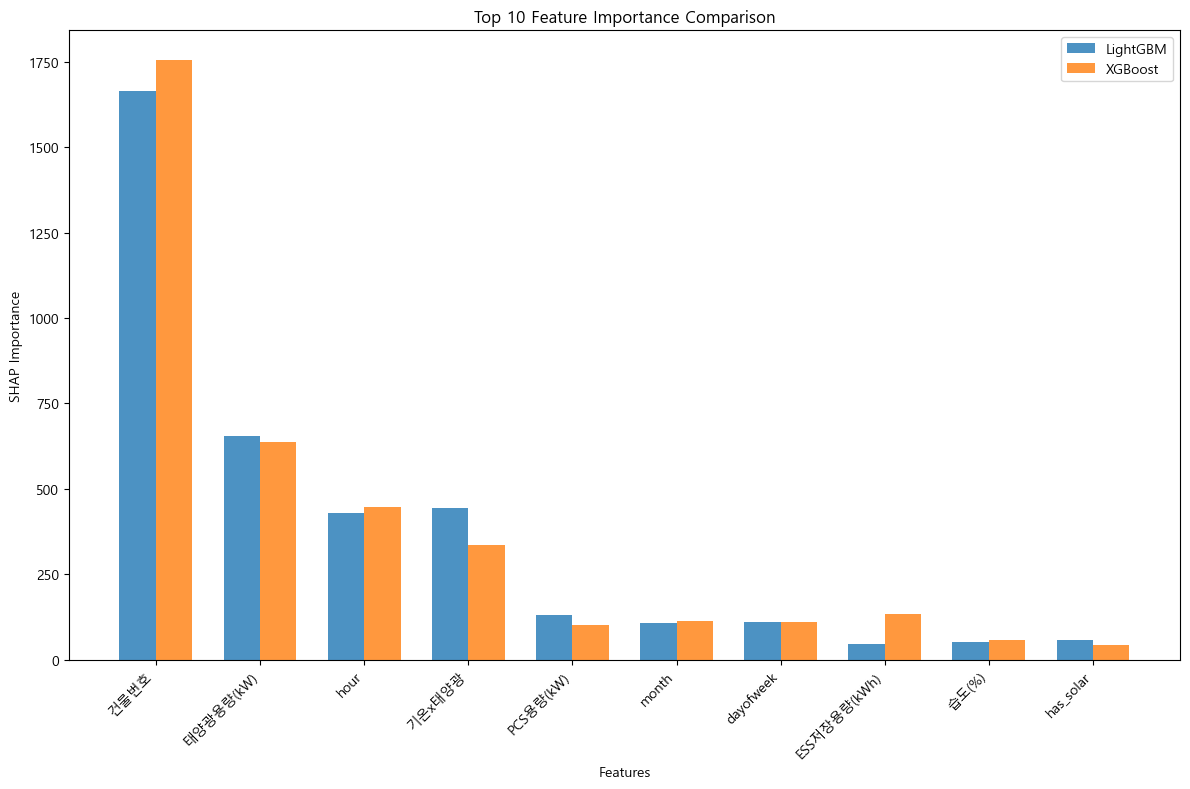

2. LightGBM SHAP ÏöîÏïΩ ÌîåÎ°Ø


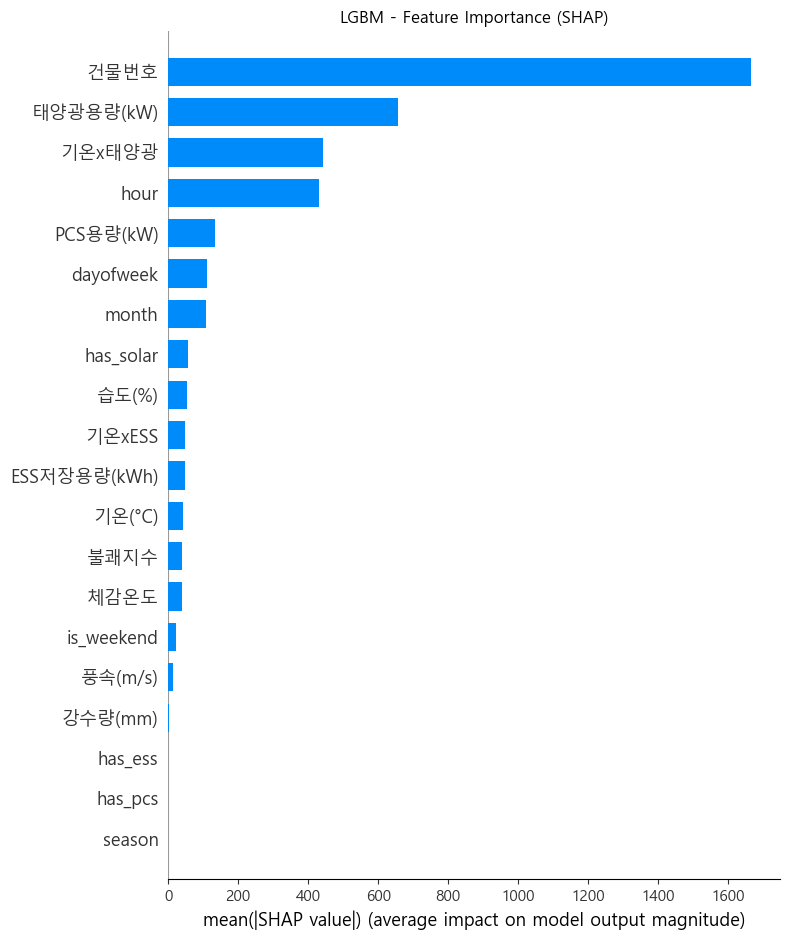

3. XGBoost SHAP ÏöîÏïΩ ÌîåÎ°Ø


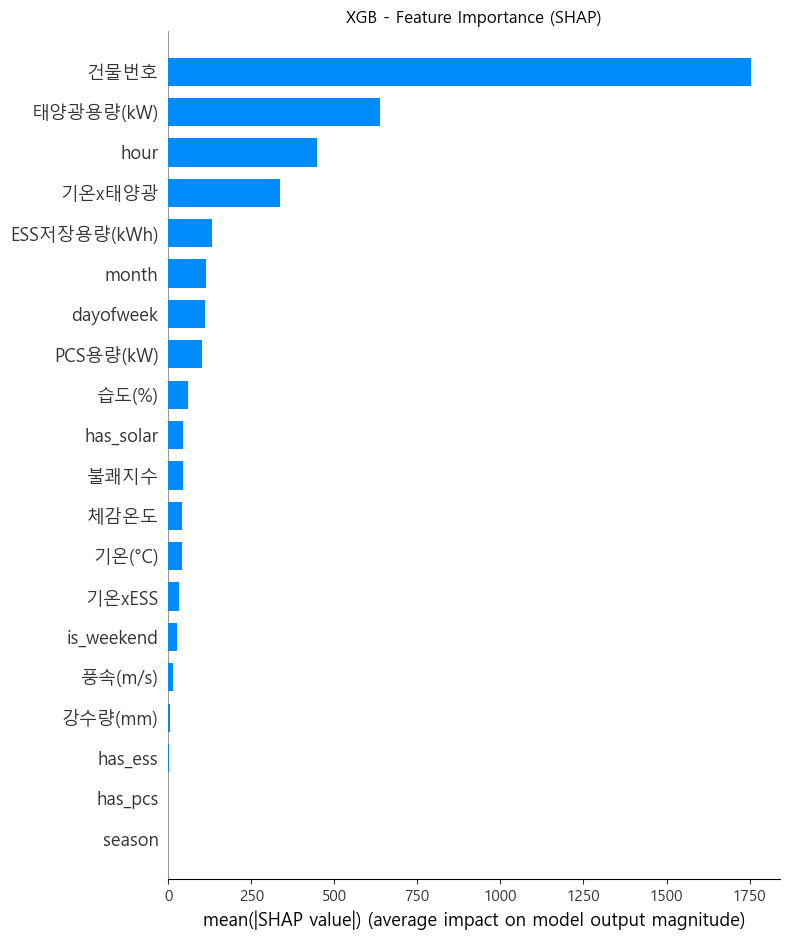

In [ ]:
model, predictions = run_ensemble_with_shap(merged_df)
quick_shap_analysis(model)